In [15]:
import os
import json
import numpy as np
import xarray as xr
import pandas as pd
import geopandas as gpd

import cartopy.feature as cfeature
import cartopy.crs as ccrs
import cartopy.feature as cf

from matplotlib import patches
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec

import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.append(os.path.abspath(".."))
from function import ART_downscale as ART_down
from function import ART_preprocessing as ART_pre

## Code to remove the BETA max value in CMORPH data

In [2]:
cor = 'spearman'
npix = 2
acf = 'mar'
yy_s, yy_e = 2002, 2023

In [3]:
sys.exit()

SystemExit: 

In [122]:
dir_base = os.path.join('/','media','arturo','T9','Data','Italy','Satellite','5_DOWN')

In [123]:
data_dir = os.path.join(dir_base, f'ITALY_DOWN_CMORPH_3h_{yy_s}_{yy_e}_npix_{npix}_thr_1_acf_{acf}_genetic_pearson.nc')
DATA = xr.open_dataset(data_dir)

lon2d_CM, lat2d_CM = np.meshgrid(DATA.lon.values, DATA.lat.values)

year = DATA.year.values
Tr = DATA.Tr.values
lat = DATA.lat.values
lon = DATA.lon.values

NYs = DATA.NYs.values
CYs = DATA.CYs.values
WYs = DATA.WYs.values
Mev_s = DATA.Mev_s.values

NYd = DATA.NYd.values
CYd = DATA.CYd.values
WYd = DATA.WYd.values
Mev_d = DATA.Mev_d.values

BETA = DATA.BETA.values
GAMMA = DATA.GAMMA.values
FUNVAL = DATA.FUNVAL.values

In [124]:
# Remove CMORPH maximum BETA value
BETA[BETA>=1.36] = 1.36

Text(0.0, 1.0, '(b) Down-Quantiles Spearman')

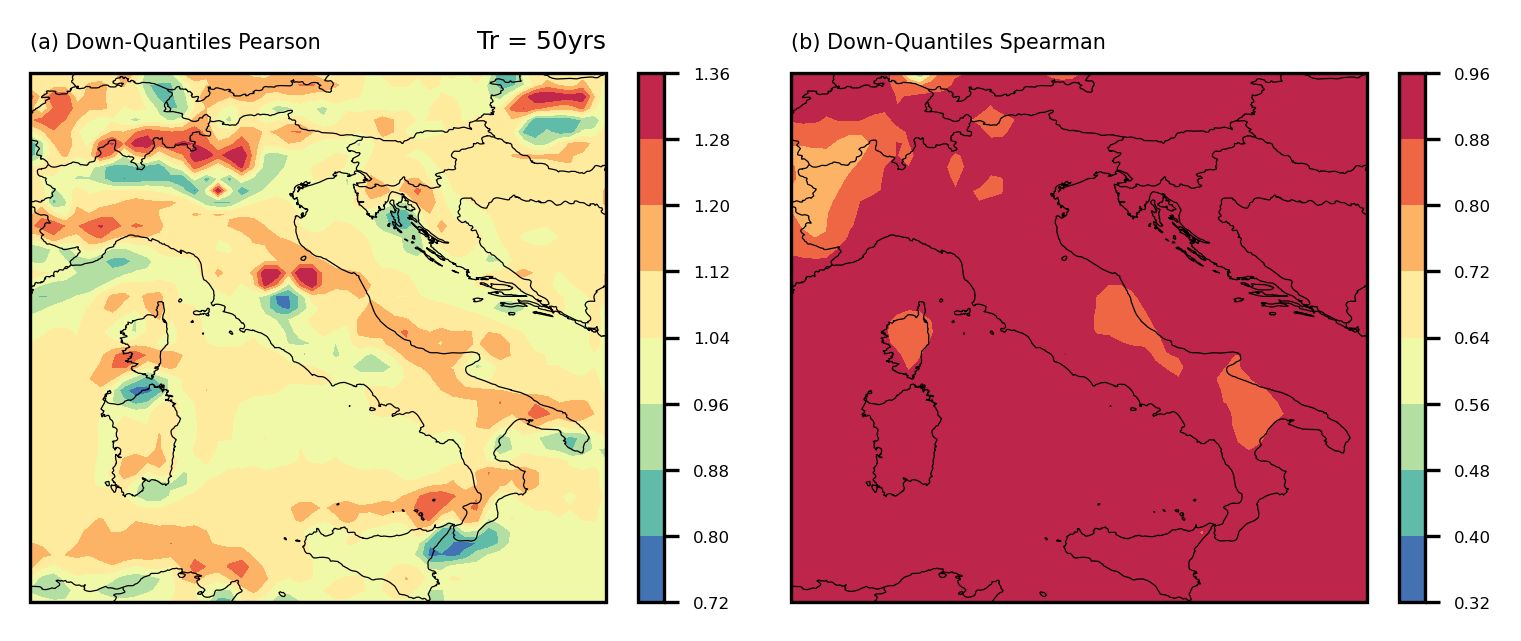

In [125]:
cmap = plt.cm.Spectral_r
proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(6,3),dpi=300)
gs = gridspec.GridSpec(1,2)

# ==============================================================================
ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.add_feature(cfeature.COASTLINE,linewidth=0.3,color='black',zorder=4)
ax1.add_feature(cfeature.BORDERS,linewidth=0.3,color='black',zorder=4)
a1 = ax1.contourf(lon2d_CM, lat2d_CM, BETA,cmap=cmap, levels=None)
cbar = plt.colorbar(a1, ax=ax1, orientation='vertical', pad=0.05, fraction=0.0417)
cbar.ax.tick_params(labelsize=4)
ax1.set_title('(a) Down-Quantiles Pearson', fontsize=5, loc='left')
ax1.set_title('Tr = 50yrs', fontsize=6, loc='right')

# ==============================================================================
ax1 = plt.subplot(gs[0, 1], projection = proj)
ax1.add_feature(cfeature.COASTLINE,linewidth=0.3,color='black',zorder=4)
ax1.add_feature(cfeature.BORDERS,linewidth=0.3,color='black',zorder=4)
a1 = ax1.contourf(lon2d_CM, lat2d_CM, GAMMA,cmap=cmap, levels=None)
cbar = plt.colorbar(a1, ax=ax1, orientation='vertical', pad=0.05, fraction=0.0417)
cbar.ax.tick_params(labelsize=4)
ax1.set_title('(b) Down-Quantiles Spearman', fontsize=5, loc='left')


In [126]:
NYd2, CYd2, WYd2 = ART_downscale.down_year_parameters(NYs, CYs, WYs, BETA, GAMMA)

Text(0.0, 1.0, '(d) Shape Corrected')

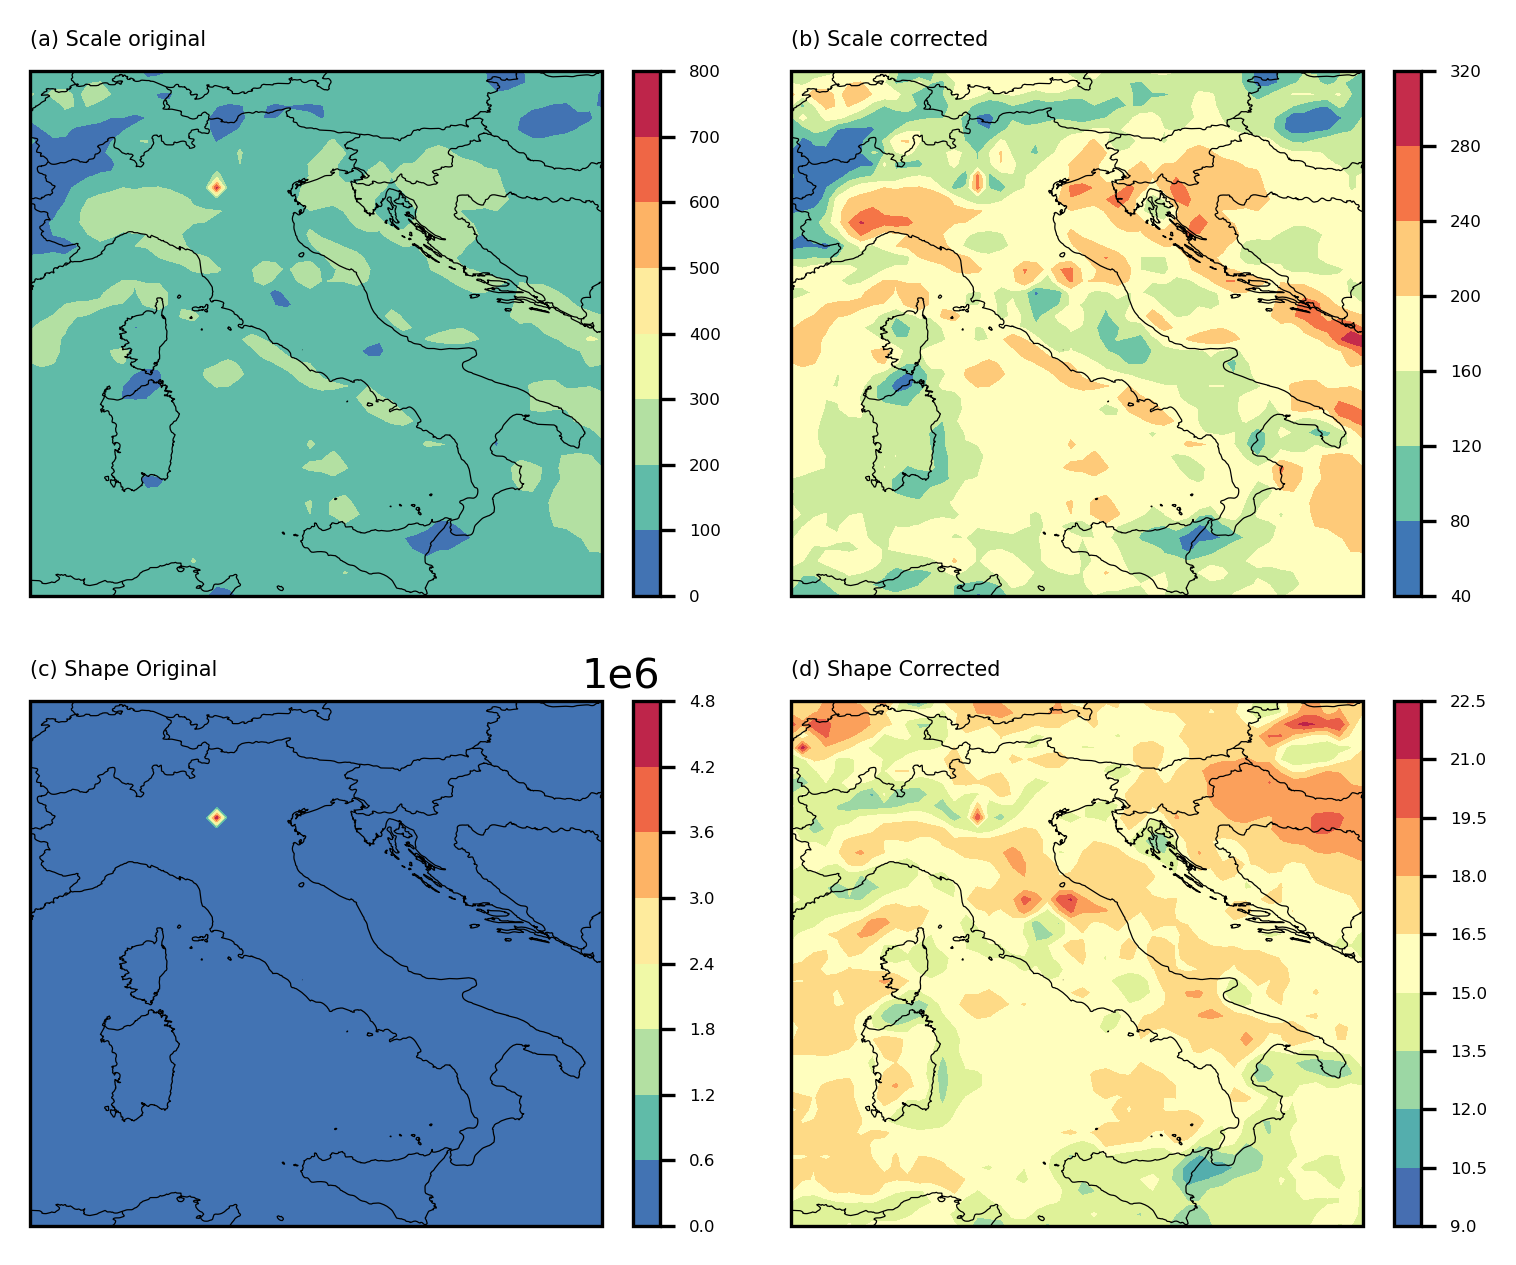

In [127]:
cmap = plt.cm.Spectral_r
proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(6,5),dpi=300)
gs = gridspec.GridSpec(2,2)

# ==============================================================================
ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.add_feature(cfeature.COASTLINE,linewidth=0.3,color='black',zorder=4)
ax1.add_feature(cfeature.BORDERS,linewidth=0.3,color='black',zorder=4)
a1 = ax1.contourf(lon2d_CM, lat2d_CM, np.sum(CYd,axis=0), cmap=cmap, levels=None)
cbar = plt.colorbar(a1, ax=ax1, orientation='vertical', pad=0.05, fraction=0.0417)
cbar.ax.tick_params(labelsize=4)
ax1.set_title('(a) Scale original', fontsize=5, loc='left')

# ==============================================================================
ax1 = plt.subplot(gs[0, 1], projection = proj)
ax1.add_feature(cfeature.COASTLINE,linewidth=0.3,color='black',zorder=4)
ax1.add_feature(cfeature.BORDERS,linewidth=0.3,color='black',zorder=4)
a1 = ax1.contourf(lon2d_CM, lat2d_CM, np.sum(CYd2,axis=0), cmap=cmap, levels=None)
cbar = plt.colorbar(a1, ax=ax1, orientation='vertical', pad=0.05, fraction=0.0417)
cbar.ax.tick_params(labelsize=4)
ax1.set_title('(b) Scale corrected', fontsize=5, loc='left')

# ==============================================================================
ax1 = plt.subplot(gs[1, 0], projection = proj)
ax1.add_feature(cfeature.COASTLINE,linewidth=0.3,color='black',zorder=4)
ax1.add_feature(cfeature.BORDERS,linewidth=0.3,color='black',zorder=4)
a1 = ax1.contourf(lon2d_CM, lat2d_CM, np.sum(WYd,axis=0), cmap=cmap, levels=None)
cbar = plt.colorbar(a1, ax=ax1, orientation='vertical', pad=0.05, fraction=0.0417)
cbar.ax.tick_params(labelsize=4)
ax1.set_title('(c) Shape Original', fontsize=5, loc='left')

# ==============================================================================
ax1 = plt.subplot(gs[1, 1], projection = proj)
ax1.add_feature(cfeature.COASTLINE,linewidth=0.3,color='black',zorder=4)
ax1.add_feature(cfeature.BORDERS,linewidth=0.3,color='black',zorder=4)
a1 = ax1.contourf(lon2d_CM, lat2d_CM, np.sum(WYd2,axis=0), cmap=cmap, levels=None)
cbar = plt.colorbar(a1, ax=ax1, orientation='vertical', pad=0.05, fraction=0.0417)
cbar.ax.tick_params(labelsize=4)
ax1.set_title('(d) Shape Corrected', fontsize=5, loc='left')

In [128]:
Quantilesd = np.zeros([6,len(lat),len(lon)])
Fi = 1-1/Tr
for i in range(len(lat)):
    for j in range(len(lon)):
        x0 = 9.0*np.mean(CYd[:,i,j])
        Quantilesd[:,i,j] = DOWN_raw.mev_quant_update(Fi, x0, NYd2[:,i,j], CYd2[:,i,j], WYd2[:,i,j], thresh=1)[0]

Text(0.0, 1.0, '(d) Quantiles Corrected - 200 yrs')

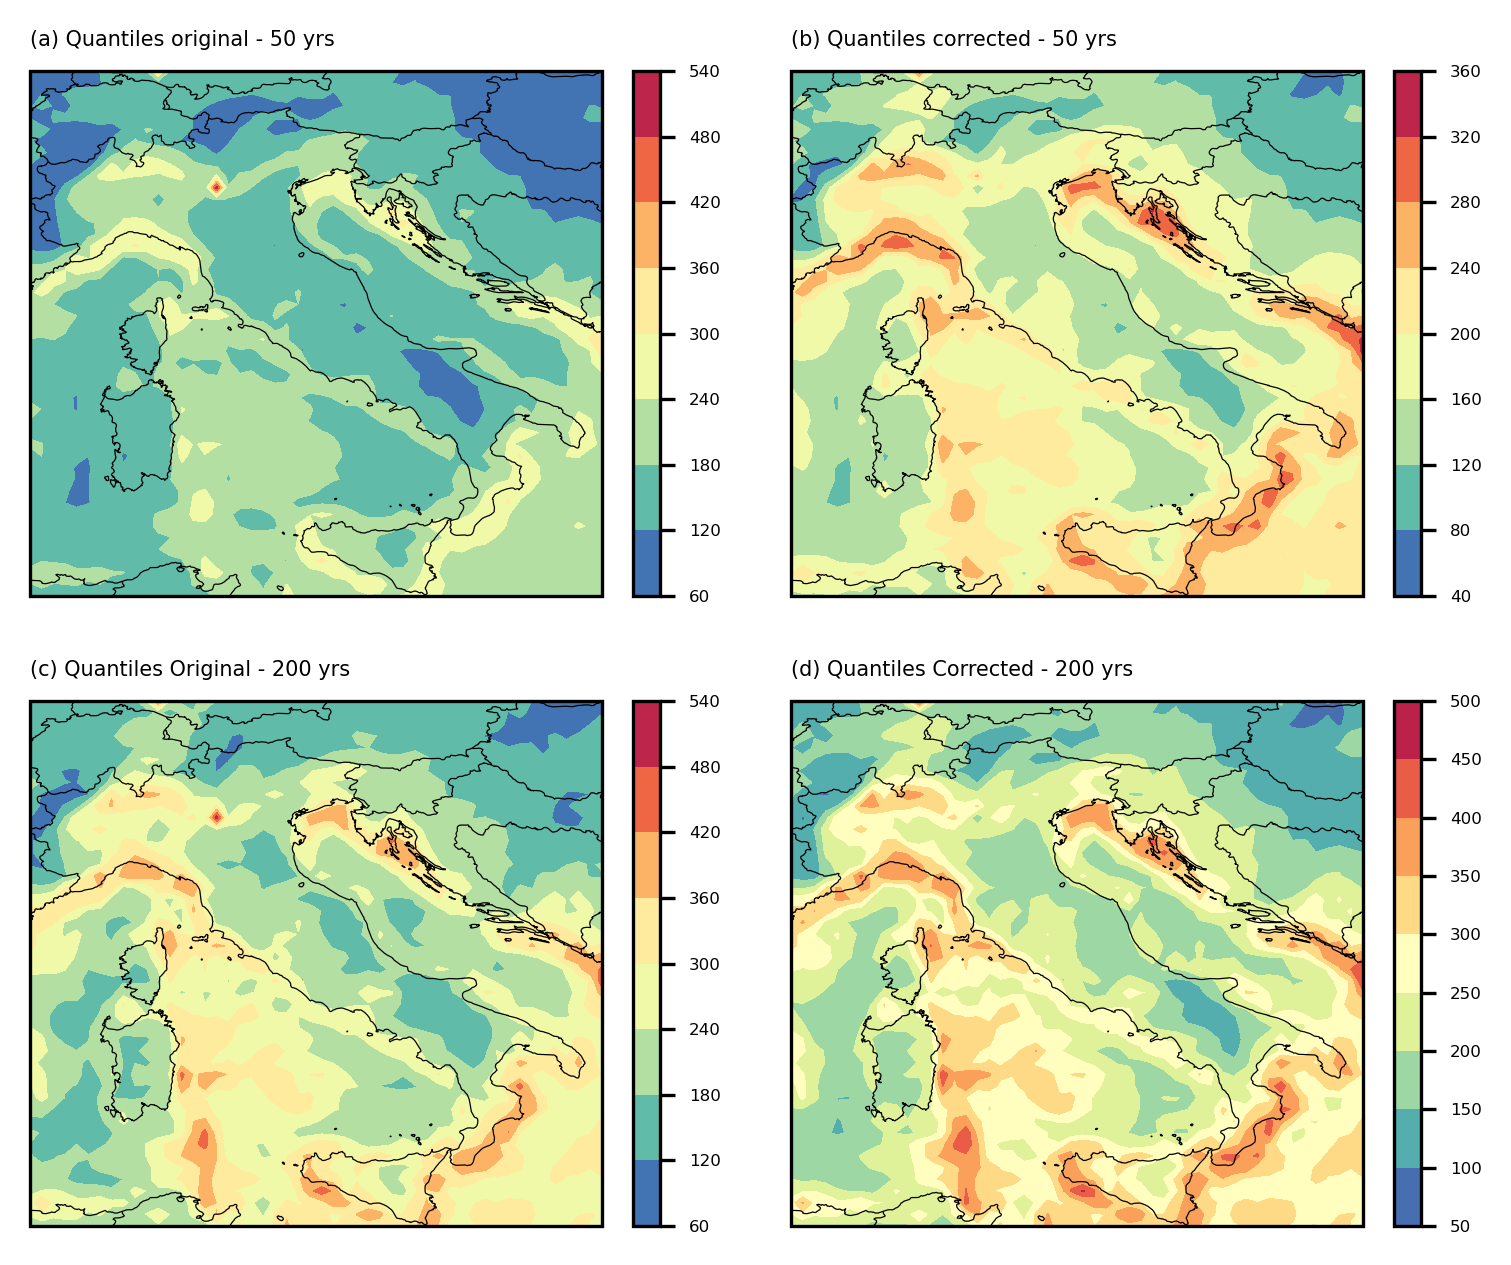

In [129]:
cmap = plt.cm.Spectral_r
proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(6,5),dpi=300)
gs = gridspec.GridSpec(2,2)

# ==============================================================================
ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.add_feature(cfeature.COASTLINE,linewidth=0.3,color='black',zorder=4)
ax1.add_feature(cfeature.BORDERS,linewidth=0.3,color='black',zorder=4)
a1 = ax1.contourf(lon2d_CM, lat2d_CM, Mev_d[3,:,:], cmap=cmap, levels=None)
cbar = plt.colorbar(a1, ax=ax1, orientation='vertical', pad=0.05, fraction=0.0417)
cbar.ax.tick_params(labelsize=4)
ax1.set_title('(a) Quantiles original - 50 yrs', fontsize=5, loc='left')

# ==============================================================================
ax1 = plt.subplot(gs[0, 1], projection = proj)
ax1.add_feature(cfeature.COASTLINE,linewidth=0.3,color='black',zorder=4)
ax1.add_feature(cfeature.BORDERS,linewidth=0.3,color='black',zorder=4)
a1 = ax1.contourf(lon2d_CM, lat2d_CM, Quantilesd[3,:,:], cmap=cmap, levels=None)
cbar = plt.colorbar(a1, ax=ax1, orientation='vertical', pad=0.05, fraction=0.0417)
cbar.ax.tick_params(labelsize=4)
ax1.set_title('(b) Quantiles corrected - 50 yrs', fontsize=5, loc='left')

# ==============================================================================
ax1 = plt.subplot(gs[1, 0], projection = proj)
ax1.add_feature(cfeature.COASTLINE,linewidth=0.3,color='black',zorder=4)
ax1.add_feature(cfeature.BORDERS,linewidth=0.3,color='black',zorder=4)
a1 = ax1.contourf(lon2d_CM, lat2d_CM, Mev_d[5,:,:], cmap=cmap, levels=None)
cbar = plt.colorbar(a1, ax=ax1, orientation='vertical', pad=0.05, fraction=0.0417)
cbar.ax.tick_params(labelsize=4)
ax1.set_title('(c) Quantiles Original - 200 yrs', fontsize=5, loc='left')

# ==============================================================================
ax1 = plt.subplot(gs[1, 1], projection = proj)
ax1.add_feature(cfeature.COASTLINE,linewidth=0.3,color='black',zorder=4)
ax1.add_feature(cfeature.BORDERS,linewidth=0.3,color='black',zorder=4)
a1 = ax1.contourf(lon2d_CM, lat2d_CM, Quantilesd[5,:,:], cmap=cmap, levels=None)
cbar = plt.colorbar(a1, ax=ax1, orientation='vertical', pad=0.05, fraction=0.0417)
cbar.ax.tick_params(labelsize=4)
ax1.set_title('(d) Quantiles Corrected - 200 yrs', fontsize=5, loc='left')

In [130]:
DOWN_xr = xr.Dataset(data_vars={
                    "NYs": (("year","lat","lon"), NYs),
                    "CYs": (("year","lat","lon"), CYs),
                    "WYs": (("year","lat","lon"), WYs),
                    "Mev_s": (("Tr","lat","lon"), Mev_s),
                    "NYd": (("year","lat","lon"), NYd2),
                    "CYd": (("year","lat","lon"), CYd2),
                    "WYd": (("year","lat","lon"), WYd2),
                    "Mev_d": (("Tr","lat","lon"), Quantilesd),
                    "BETA": (("lat","lon"), BETA),
                    "GAMMA": (("lat","lon"), GAMMA),
                    "FUNVAL": (("lat","lon"), FUNVAL)
                    },
    coords={'year':year,'Tr':Tr,'lat': lat, 'lon': lon},
    attrs=dict(description=DATA.description))

DOWN_xr.NYs.attrs["units"] = "day"
DOWN_xr.NYs.attrs["long_name"] = "Number of wet days"
DOWN_xr.NYs.attrs["origname"] = "Wet days"

DOWN_xr.CYs.attrs["units"] = "dimensionless"
DOWN_xr.CYs.attrs["long_name"] = "Weibull scale parameter"
DOWN_xr.CYs.attrs["origname"] = "Scale"

DOWN_xr.WYs.attrs["units"] = "dimensionless"
DOWN_xr.WYs.attrs["long_name"] = "Weibull shape parameter"
DOWN_xr.WYs.attrs["origname"] = "Shape"

DOWN_xr.Mev_s.attrs["units"] = "mm/day"
DOWN_xr.Mev_s.attrs["long_name"] = "Satellite Maximum Quantiles"
DOWN_xr.Mev_s.attrs["origname"] = "Sat quantiles"

DOWN_xr.NYd.attrs["units"] = "day"
DOWN_xr.NYd.attrs["long_name"] = "Downscale Number of wet days"
DOWN_xr.NYd.attrs["origname"] = "Down wet days"

DOWN_xr.CYd.attrs["units"] = "dimensionless"
DOWN_xr.CYd.attrs["long_name"] = "Downscale Weibull scale parameter"
DOWN_xr.CYd.attrs["origname"] = "Down scale"

DOWN_xr.WYd.attrs["units"] = "dimensionless"
DOWN_xr.WYd.attrs["long_name"] = "Downscale Weibull shape parameter"
DOWN_xr.WYd.attrs["origname"] = "Down shape"

DOWN_xr.Mev_d.attrs["units"] = "mm/day"
DOWN_xr.Mev_d.attrs["long_name"] = "Downscaling Maximum Quantiles"
DOWN_xr.Mev_d.attrs["origname"] = "Downscaling quantiles"

DOWN_xr.BETA.attrs["units"] = "dimensionless"
DOWN_xr.BETA.attrs["long_name"] = "Itermittency function between two generic scales"
DOWN_xr.BETA.attrs["origname"] = "Beta"

DOWN_xr.GAMMA.attrs["units"] = "dimensionless"
DOWN_xr.GAMMA.attrs["long_name"] = "Variance function between two generic scales"
DOWN_xr.GAMMA.attrs["origname"] = "Gamma"

DOWN_xr.FUNVAL.attrs["units"] = "dimensionless"
DOWN_xr.FUNVAL.attrs["long_name"] = "Minimum error achieved by the optimization"
DOWN_xr.FUNVAL.attrs["origname"] = "Funval"

DOWN_xr.lat.attrs["units"] = "degrees_north"
DOWN_xr.lat.attrs["long_name"] = "Latitude"

DOWN_xr.lon.attrs["units"] = "degrees_east"
DOWN_xr.lon.attrs["long_name"] = "Longitude"

In [131]:
DOWN_out = os.path.join(dir_base, f'ITALY_DOWN_CMORPH_3h_{yy_s}_{yy_e}_npix_{npix}_thr_1_acf_{acf}_genetic_pearson_corrected.nc')
print(f'Export Data to {DOWN_out}')
# DOWN_xr.to_netcdf(DOWN_out)

Export Data to /media/arturo/T9/Data/Italy/Satellite/5_DOWN/ITALY_DOWN_CMORPH_3h_2002_2023_npix_2_thr_1_acf_mar_genetic_pearson_corrected.nc


In [132]:
sys.exit()

SystemExit: 

## Analisis by pixel using mean

In [133]:
dir_base = os.path.join('/','media','arturo','T9','Data','Italy','Satellite','CMORPH','3h')

In [142]:
DATA = xr.open_dataset(os.path.join(dir_base,'CMORPH_Italy_3hr_1998_01_01_2023_12_31.nc'))
lon = DATA.lon.values
lat = DATA.lat.values
lon2d, lat2d = np.meshgrid(lon, lat)
PRE = DATA.PRE.values

PRE[PRE<0]=np.nan
PRE[PRE>=60]=np.nan

PRE_mean = np.nanmean(PRE,axis=0)
PRE_sum = np.nansum(PRE,axis=0)

In [143]:
np.where(PRE_mean==np.nanmax(PRE_mean))

(array([38]), array([18]))

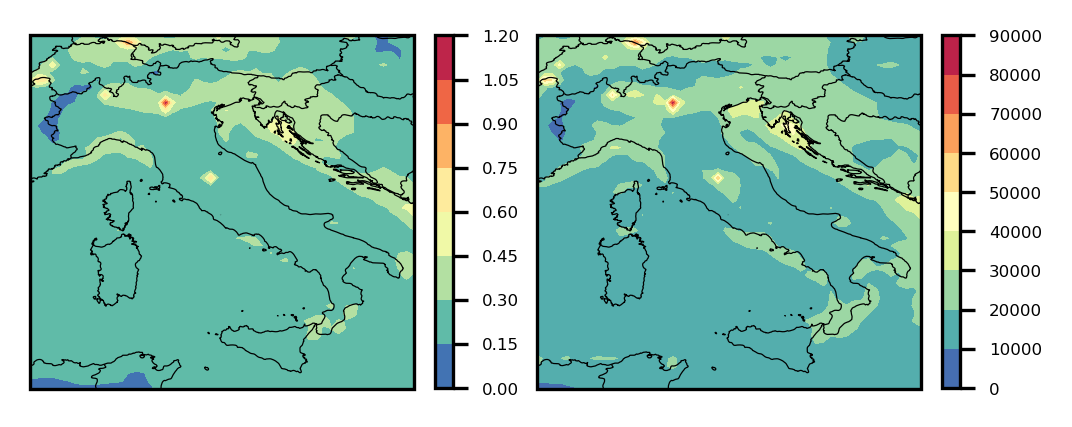

In [144]:
cmap = plt.cm.Spectral_r
proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(4,2),dpi=300)
gs = gridspec.GridSpec(1,2)

# ==============================================================================
ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.add_feature(cfeature.COASTLINE,linewidth=0.3,color='black',zorder=4)
ax1.add_feature(cfeature.BORDERS,linewidth=0.3,color='black',zorder=4)
a1 = ax1.contourf(lon2d, lat2d, PRE_mean, cmap=cmap, levels=None)
cbar = plt.colorbar(a1, ax=ax1, orientation='vertical', pad=0.05, fraction=0.0417)
cbar.ax.tick_params(labelsize=4)
# ax1.scatter(lon[18],lat[38],s=0.5,c='k',marker='o')

# ==============================================================================
ax1 = plt.subplot(gs[0, 1], projection = proj)
ax1.add_feature(cfeature.COASTLINE,linewidth=0.3,color='black',zorder=4)
ax1.add_feature(cfeature.BORDERS,linewidth=0.3,color='black',zorder=4)
a1 = ax1.contourf(lon2d, lat2d, PRE_sum, cmap=cmap, levels=None)
cbar = plt.colorbar(a1, ax=ax1, orientation='vertical', pad=0.05, fraction=0.0417)
cbar.ax.tick_params(labelsize=4)
# ax1.scatter(lon[18],lat[38],s=0.5,c='k',marker='o')

(0.0, 100.0)

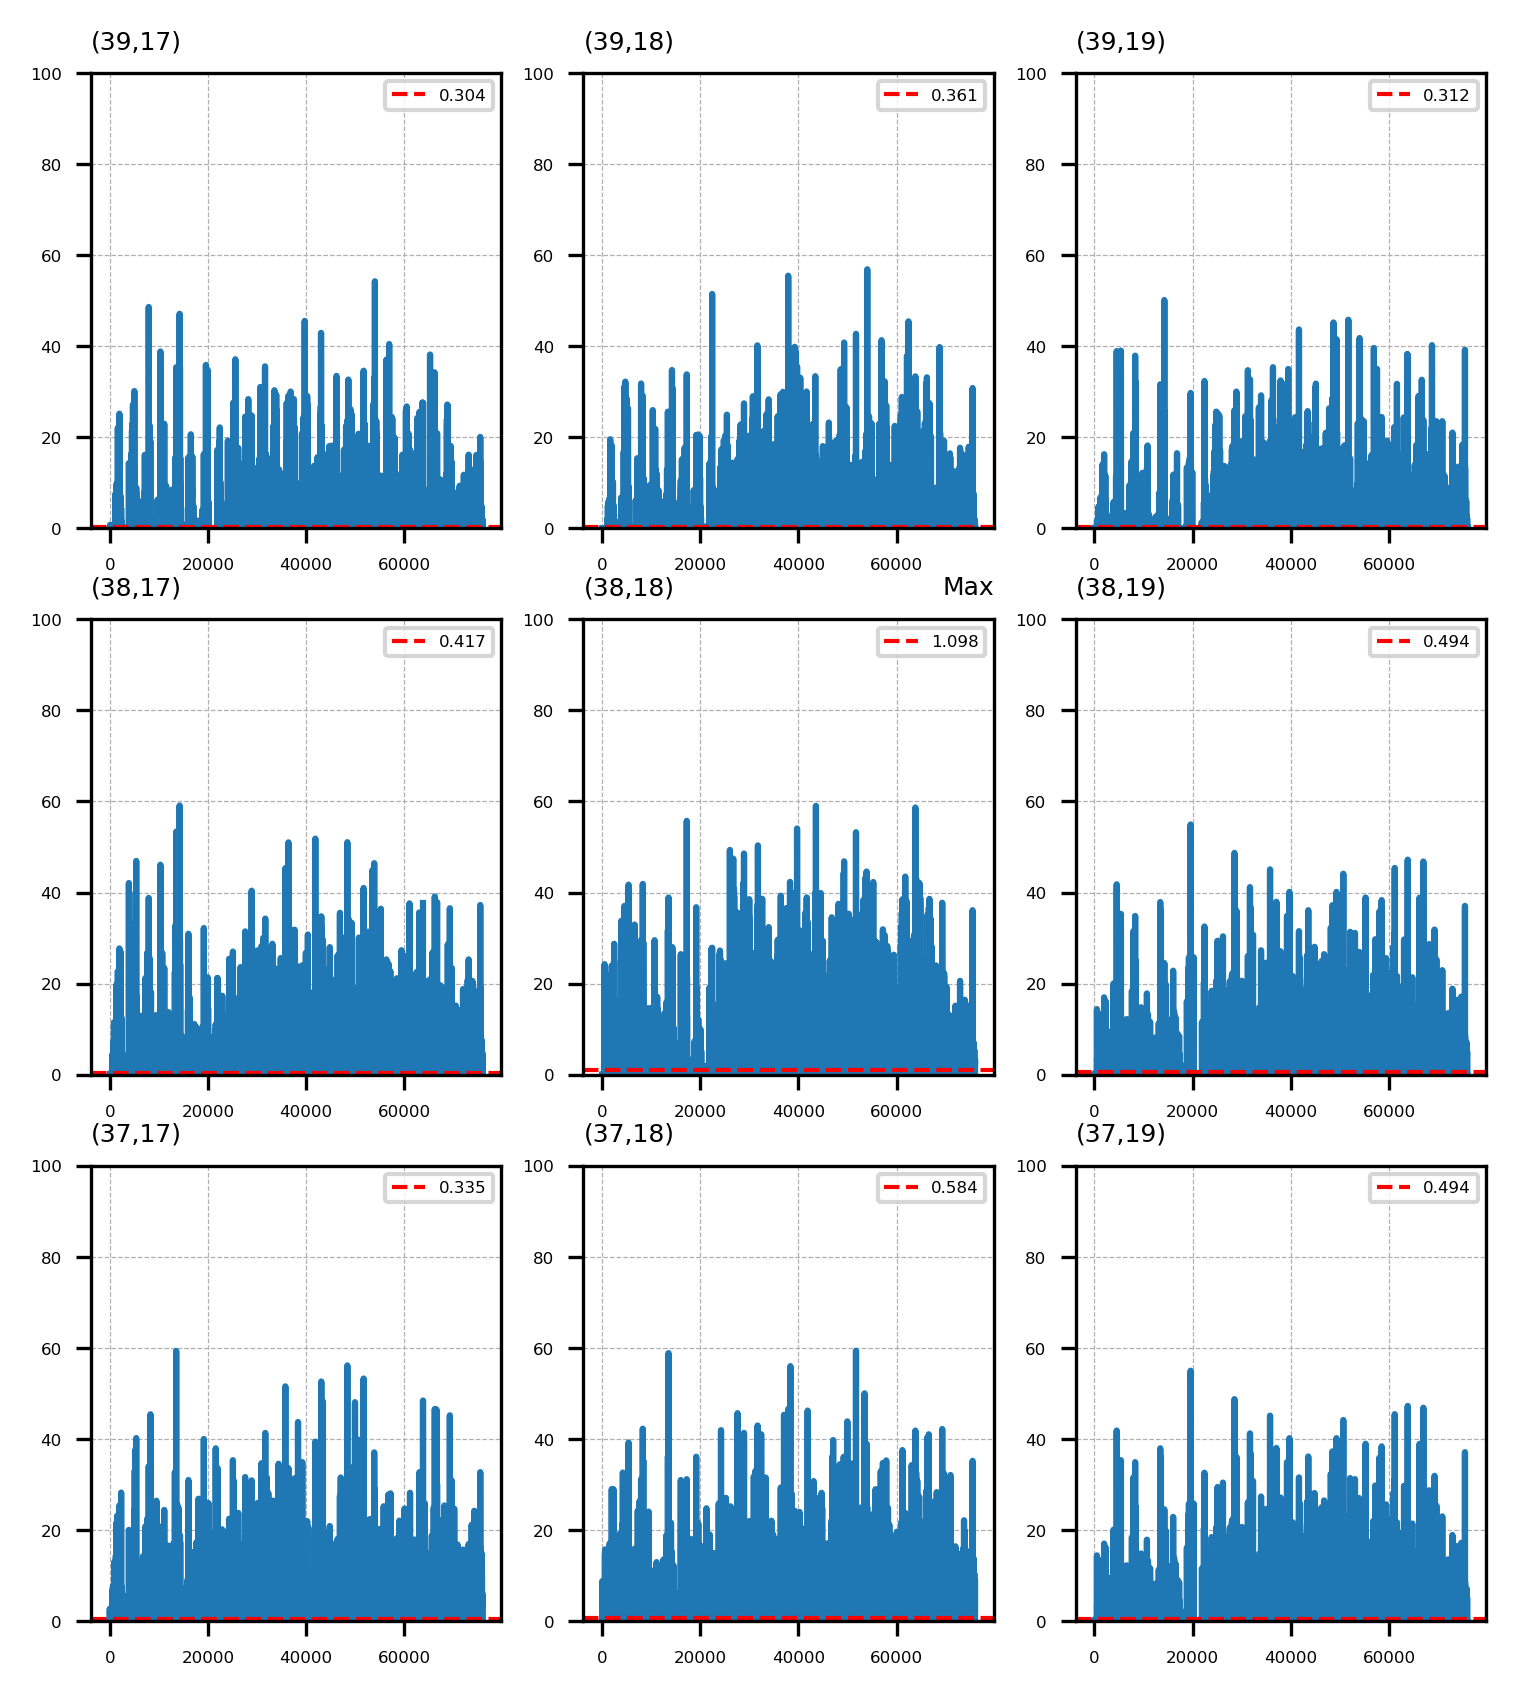

In [145]:
labelfontsize = 4

fig = plt.figure(figsize=(6,6.7),dpi=300)
gs = gridspec.GridSpec(3,3)

# ==============================================================================
ax1 = plt.subplot(gs[0, 0])
ax1.plot(PRE[:,39,17])
ax1.axhline(y=np.nanmean(PRE[:,39,17]), color='red', linestyle='--', linewidth=1, label=np.round(np.nanmean(PRE[:,39,17]),3))
ax1.tick_params(axis='both', which='major', labelsize=labelfontsize)
ax1.grid(linewidth=0.3, linestyle='--')
ax1.set_title('(39,17)',fontsize=6,loc='left')
ax1.legend(fontsize=4)
ax1.set_ylim(0,100)

# ==============================================================================
ax1 = plt.subplot(gs[0, 1])
plt.plot(PRE[:,39,18])
ax1.axhline(y=np.nanmean(PRE[:,39,18]), color='red', linestyle='--', linewidth=1, label=np.round(np.nanmean(PRE[:,39,18]),3))
ax1.tick_params(axis='both', which='major', labelsize=labelfontsize)
ax1.grid(linewidth=0.3, linestyle='--')
ax1.set_title('(39,18)',fontsize=6,loc='left')
ax1.legend(fontsize=4)
ax1.set_ylim(0,100)

# ==============================================================================
ax1 = plt.subplot(gs[0, 2])
plt.plot(PRE[:,39,19])
ax1.axhline(y=np.nanmean(PRE[:,39,19]), color='red', linestyle='--', linewidth=1, label=np.round(np.nanmean(PRE[:,39,19]),3))
ax1.tick_params(axis='both', which='major', labelsize=labelfontsize)
ax1.grid(linewidth=0.3, linestyle='--')
ax1.set_title('(39,19)',fontsize=6,loc='left')
ax1.legend(fontsize=4)
ax1.set_ylim(0,100)

# ==============================================================================
ax1 = plt.subplot(gs[1, 0])
plt.plot(PRE[:,38,17])
ax1.axhline(y=np.nanmean(PRE[:,38,17]), color='red', linestyle='--', linewidth=1, label=np.round(np.nanmean(PRE[:,38,17]),3))
ax1.tick_params(axis='both', which='major', labelsize=labelfontsize)
ax1.grid(linewidth=0.3, linestyle='--')
ax1.set_title('(38,17)',fontsize=6,loc='left')
ax1.legend(fontsize=4)
ax1.set_ylim(0,100)

# ==============================================================================
ax1 = plt.subplot(gs[1, 1])
plt.plot(PRE[:,38,18])
ax1.axhline(y=np.nanmean(PRE[:,38,18]), color='red', linestyle='--', linewidth=1, label=np.round(np.nanmean(PRE[:,38,18]),3))
ax1.tick_params(axis='both', which='major', labelsize=labelfontsize)
ax1.grid(linewidth=0.3, linestyle='--')
ax1.set_title('(38,18)',fontsize=6,loc='left')
ax1.set_title('Max',fontsize=6,loc='right')
ax1.legend(fontsize=4)
ax1.set_ylim(0,100)

# ==============================================================================
ax1 = plt.subplot(gs[1, 2])
plt.plot(PRE[:,38,19])
ax1.axhline(y=np.nanmean(PRE[:,38,19]), color='red', linestyle='--', linewidth=1, label=np.round(np.nanmean(PRE[:,38,19]),3))
ax1.tick_params(axis='both', which='major', labelsize=labelfontsize)
ax1.grid(linewidth=0.3, linestyle='--')
ax1.set_title('(38,19)',fontsize=6,loc='left')
ax1.legend(fontsize=4)
ax1.set_ylim(0,100)

# ==============================================================================
ax1 = plt.subplot(gs[2, 0])
plt.plot(PRE[:,37,17])
ax1.axhline(y=np.nanmean(PRE[:,37,17]), color='red', linestyle='--', linewidth=1, label=np.round(np.nanmean(PRE[:,37,17]),3))
ax1.tick_params(axis='both', which='major', labelsize=labelfontsize)
ax1.set_title('(37,17)',fontsize=6,loc='left')
ax1.grid(linewidth=0.3, linestyle='--')
ax1.legend(fontsize=4)
ax1.set_ylim(0,100)

# ==============================================================================
ax1 = plt.subplot(gs[2, 1])
plt.plot(PRE[:,37,18])
ax1.axhline(y=np.nanmean(PRE[:,37,18]), color='red', linestyle='--', linewidth=1, label=np.round(np.nanmean(PRE[:,37,18]),3))
ax1.tick_params(axis='both', which='major', labelsize=labelfontsize)
ax1.grid(linewidth=0.3, linestyle='--')
ax1.set_title('(37,18)',fontsize=6,loc='left')
ax1.legend(fontsize=4)
ax1.set_ylim(0,100)

# ==============================================================================
ax1 = plt.subplot(gs[2, 2])
plt.plot(PRE[:,38,19])
ax1.axhline(y=np.nanmean(PRE[:,38,19]), color='red', linestyle='--', linewidth=1, label=np.round(np.nanmean(PRE[:,38,19]),3))
ax1.tick_params(axis='both', which='major', labelsize=labelfontsize)
ax1.grid(linewidth=0.3, linestyle='--')
ax1.set_title('(37,19)',fontsize=6,loc='left')
ax1.legend(fontsize=4)
ax1.set_ylim(0,100)

In [ ]:
sys.exit()

SystemExit: 

## Analysis per Year

In [ ]:
dir_base = os.path.join('/','media','arturo','T9','Data','Italy','Satellite','CMORPH','3h')

In [ ]:
labelfontsize = 4

for year in range(yy_s,yy_e+1):#2024
    print(f'Year: {year}')
    DATA = xr.open_dataset(os.path.join(dir_base,'CMORPH_Italy_3hr_1998_01_01_2023_12_31.nc'))
    DATA = DATA.sel(time=slice(f'{year}-01-01', f'{year}-12-31'))

    lon = DATA.lon.values
    lat = DATA.lat.values
    lon2d, lat2d = np.meshgrid(lon, lat)
    PRE = DATA.PRE.values

    PRE[PRE<0]=np.nan

    PRE_mean = np.nanmean(PRE,axis=0)
    PRE_sum = np.nansum(PRE,axis=0)
    
    val_max = np.nanmax(PRE[:,38,18])

    fig = plt.figure(figsize=(6,6.7),dpi=300)
    gs = gridspec.GridSpec(3,3)

    # ==============================================================================
    ax1 = plt.subplot(gs[0, 0])
    ax1.plot(PRE[:,39,17])
    ax1.axhline(y=np.nanmean(PRE[:,39,17]), color='red', linestyle='--', linewidth=1, label=np.round(np.nanmean(PRE[:,39,17]),3))
    ax1.tick_params(axis='both', which='major', labelsize=labelfontsize)
    ax1.grid(linewidth=0.3, linestyle='--')
    ax1.set_title('(39,17)',fontsize=6,loc='left')
    ax1.legend(fontsize=4)
    ax1.set_ylim(0,val_max+20)

    # ==============================================================================
    ax1 = plt.subplot(gs[0, 1])
    plt.plot(PRE[:,39,18])
    ax1.axhline(y=np.nanmean(PRE[:,39,18]), color='red', linestyle='--', linewidth=1, label=np.round(np.nanmean(PRE[:,39,18]),3))
    ax1.tick_params(axis='both', which='major', labelsize=labelfontsize)
    ax1.grid(linewidth=0.3, linestyle='--')
    ax1.set_title('(39,18)',fontsize=6,loc='left')
    ax1.legend(fontsize=4)
    ax1.set_ylim(0,val_max+20)

    # ==============================================================================
    ax1 = plt.subplot(gs[0, 2])
    plt.plot(PRE[:,39,19])
    ax1.axhline(y=np.nanmean(PRE[:,39,19]), color='red', linestyle='--', linewidth=1, label=np.round(np.nanmean(PRE[:,39,19]),3))
    ax1.tick_params(axis='both', which='major', labelsize=labelfontsize)
    ax1.grid(linewidth=0.3, linestyle='--')
    ax1.set_title('(39,19)',fontsize=6,loc='left')
    ax1.legend(fontsize=4)
    ax1.set_ylim(0,val_max+20)

    # ==============================================================================
    ax1 = plt.subplot(gs[1, 0])
    plt.plot(PRE[:,38,17])
    ax1.axhline(y=np.nanmean(PRE[:,38,17]), color='red', linestyle='--', linewidth=1, label=np.round(np.nanmean(PRE[:,38,17]),3))
    ax1.tick_params(axis='both', which='major', labelsize=labelfontsize)
    ax1.grid(linewidth=0.3, linestyle='--')
    ax1.set_title('(38,17)',fontsize=6,loc='left')
    ax1.legend(fontsize=4)
    ax1.set_ylim(0,val_max+20)

    # ==============================================================================
    ax1 = plt.subplot(gs[1, 1])
    plt.plot(PRE[:,38,18])
    ax1.axhline(y=np.nanmean(PRE[:,38,18]), color='red', linestyle='--', linewidth=1, label=np.round(np.nanmean(PRE[:,38,18]),3))
    ax1.tick_params(axis='both', which='major', labelsize=labelfontsize)
    ax1.grid(linewidth=0.3, linestyle='--')
    ax1.set_title('(38,18)',fontsize=6,loc='left')
    ax1.set_title('Max',fontsize=6,loc='right')
    ax1.legend(fontsize=4)
    ax1.set_ylim(0,val_max+20)

    # ==============================================================================
    ax1 = plt.subplot(gs[1, 2])
    plt.plot(PRE[:,38,19])
    ax1.axhline(y=np.nanmean(PRE[:,38,19]), color='red', linestyle='--', linewidth=1, label=np.round(np.nanmean(PRE[:,38,19]),3))
    ax1.tick_params(axis='both', which='major', labelsize=labelfontsize)
    ax1.grid(linewidth=0.3, linestyle='--')
    ax1.set_title('(38,19)',fontsize=6,loc='left')
    ax1.legend(fontsize=4)
    ax1.set_ylim(0,val_max+20)

    # ==============================================================================
    ax1 = plt.subplot(gs[2, 0])
    plt.plot(PRE[:,37,17])
    ax1.axhline(y=np.nanmean(PRE[:,37,17]), color='red', linestyle='--', linewidth=1, label=np.round(np.nanmean(PRE[:,37,17]),3))
    ax1.tick_params(axis='both', which='major', labelsize=labelfontsize)
    ax1.set_title('(37,17)',fontsize=6,loc='left')
    ax1.grid(linewidth=0.3, linestyle='--')
    ax1.legend(fontsize=4)
    ax1.set_ylim(0,val_max+20)

    # ==============================================================================
    ax1 = plt.subplot(gs[2, 1])
    plt.plot(PRE[:,37,18])
    ax1.axhline(y=np.nanmean(PRE[:,37,18]), color='red', linestyle='--', linewidth=1, label=np.round(np.nanmean(PRE[:,37,18]),3))
    ax1.tick_params(axis='both', which='major', labelsize=labelfontsize)
    ax1.grid(linewidth=0.3, linestyle='--')
    ax1.set_title('(37,18)',fontsize=6,loc='left')
    ax1.legend(fontsize=4)
    ax1.set_ylim(0,val_max+20)

    # ==============================================================================
    ax1 = plt.subplot(gs[2, 2])
    plt.plot(PRE[:,38,19])
    ax1.axhline(y=np.nanmean(PRE[:,38,19]), color='red', linestyle='--', linewidth=1, label=np.round(np.nanmean(PRE[:,38,19]),3))
    ax1.tick_params(axis='both', which='major', labelsize=labelfontsize)
    ax1.grid(linewidth=0.3, linestyle='--')
    ax1.set_title('(37,19)',fontsize=6,loc='left')
    ax1.legend(fontsize=4)
    ax1.set_ylim(0,val_max+20)
    
    # ==============================================================================
    salida = os.path.join('/','home','arturo','Pictures','test',f'CMORPH_{year}.png')
    print(f'Export figure to: {salida}')
    # plt.savefig(salida,transparent = False,bbox_inches ='tight',pad_inches = 0.1, facecolor=None)
    plt.close()

Year: 2002
Export figure to: /home/arturo/Pictures/test/CMORPH_2002.png
Year: 2003
Export figure to: /home/arturo/Pictures/test/CMORPH_2003.png
Year: 2004
Export figure to: /home/arturo/Pictures/test/CMORPH_2004.png
Year: 2005
Export figure to: /home/arturo/Pictures/test/CMORPH_2005.png
Year: 2006
Export figure to: /home/arturo/Pictures/test/CMORPH_2006.png
Year: 2007
Export figure to: /home/arturo/Pictures/test/CMORPH_2007.png
Year: 2008
Export figure to: /home/arturo/Pictures/test/CMORPH_2008.png
Year: 2009
Export figure to: /home/arturo/Pictures/test/CMORPH_2009.png
Year: 2010
Export figure to: /home/arturo/Pictures/test/CMORPH_2010.png
Year: 2011
Export figure to: /home/arturo/Pictures/test/CMORPH_2011.png
Year: 2012
Export figure to: /home/arturo/Pictures/test/CMORPH_2012.png
Year: 2013
Export figure to: /home/arturo/Pictures/test/CMORPH_2013.png
Year: 2014
Export figure to: /home/arturo/Pictures/test/CMORPH_2014.png
Year: 2015
Export figure to: /home/arturo/Pictures/test/CMORPH_2

In [4]:
sys.exit()

SystemExit: 

## Compare with ERA5

In [7]:
dir_base = os.path.join('/','media','arturo','T9','Data','Italy','Satellite')

In [26]:
DATA = xr.open_dataset(os.path.join(dir_base,'CMORPH','3h','CMORPH_Italy_3hr_1998_01_01_2023_12_31.nc'))
DATA = DATA.sel(time=slice('2002-01-01', '2022-12-31'))

lon2d_CMORPH, lat2d_CMORPH = np.meshgrid(DATA.lon.values, DATA.lat.values)
CMORPH = DATA.PRE.values

CMORPH[CMORPH<0]=np.nan

CMORPH_REF = CMORPH[:,38,18]

lon_ref = DATA.lon.values[18]
lat_ref = DATA.lat.values[38]

CMORPH_mean = np.nanmean(CMORPH,axis=0)
CMORPH_sum = np.nansum(CMORPH,axis=0)

In [27]:
DATA = xr.open_dataset(os.path.join(dir_base,'ERA5','3h','ERA5_Italy_3h_2000_01_01_2023_12_31.nc'))
DATA = DATA.sel(time=slice('2002-01-01', '2022-12-31'))

lon2d_ERA5, lat2d_ERA5 = np.meshgrid(DATA.lon.values, DATA.lat.values)
ERA5 = DATA.PRE.values

ERA5[ERA5<0]=np.nan

ERA5_mean = np.nanmean(ERA5,axis=0)
ERA5_sum = np.nansum(ERA5,axis=0)

In [28]:
distances = ART_pre.haversine(lon2d_ERA5, lat2d_ERA5, lat_ref, lon_ref)
min_index = np.unravel_index(np.argmin(distances, axis=None), distances.shape)
print(min_index)
ERA5_PRE = ERA5[:,min_index[0],min_index[1]]

(np.int64(48), np.int64(52))


In [29]:
ERA5_PRE.shape, CMORPH_REF.shape

((61360,), (61360,))

In [45]:
x_vector

array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80])

In [44]:
x_vector2

array([ 0, 10, 20, 30, 40, 50, 60, 70, 80])

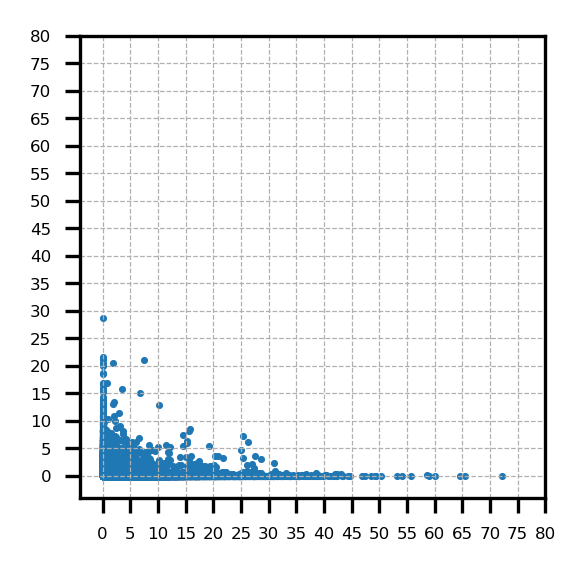

In [48]:
x_vector = np.arange(0,85,5)

fig = plt.figure(figsize=(2,2),dpi=300)
gs = gridspec.GridSpec(1,1)

# ==============================================================================
ax1 = plt.subplot(gs[0, 0])
ax1.scatter(CMORPH_REF,ERA5_PRE,s=0.5)

ax1.set_xlim(-4,80)
ax1.set_ylim(-4,80)

ax1.set_xticks(x_vector)
ax1.set_yticks(x_vector)

ax1.tick_params(axis='both', which='major', labelsize=4)
ax1.grid(linewidth=0.3, linestyle='--')